# Model Evaluation

#### Learning Objectives
- Understand why accuracy only gives a partial picture of a classifier's performance.
- Understand the motivation and definition of important evaluation metrics in machine learning.
- Learn how to use a variety of evaluation metrics to evaluate supervised machine learning models
- Learn about choosing the right metric for selecting between models or for doing parameter tuning.

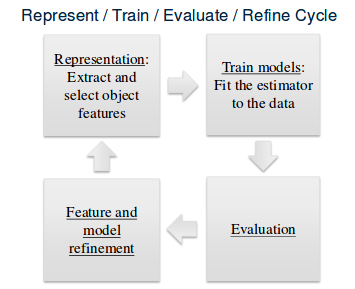

## Evaluation for Classification

* #####  Different applications have very different goals
* #####  Accuracy is widely used, but many others are possible, e.g.:
    - User satisfaction (Web search)
    - Amount of revenue (e-commerce)
    - Increase in patient survival rates (medical)

* #### It's very important to choose evaluation methods that match the goal of your application.
* #### Compute your selected evaluation metric for multiple different models.
* #### Then select the model with 'best' value of evaluation metric.

### Accuracy with imbalanced classes
* #### Suppose you have two classes:
        – Relevant (R):  the positive class
        – Not_Relevant(N): the negative class
* #### Out of 1000 randomly selected items, on average 
        – One item is relevant and has an R label
        – The rest of the items (999 of them) are not relevant and labelled N.
* #### Recall that:
        Accuracy =  #correct predictions / #total instance

* ####  You build a classifier to predict relevant items, and see that its accuracy on a test set is 99.9%. 
* ####  Wow!  Amazingly good, right?
* ####  For comparison, suppose we had a "dummy" classifier that didn't look at the features at all, and always just    blindly predicted the most frequent class (i.e. the negative N class).  

* ####  Assuming a test set of 1000 instances, what would this dummy classifier's accuracy be?
* ####  Answer:      

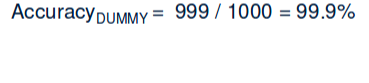

In [6]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

dataset = load_digits()
X, y = dataset.data, dataset.target

for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name,class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [19]:
type(dataset)

sklearn.utils.Bunch

In [20]:
dataset.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [21]:
dataset.data.shape

(1797, 64)

In [22]:
dataset.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [23]:
print(dataset.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [24]:
dataset.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [25]:
dataset.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [26]:
dataset.target[0]

0

<IPython.core.display.Javascript object>


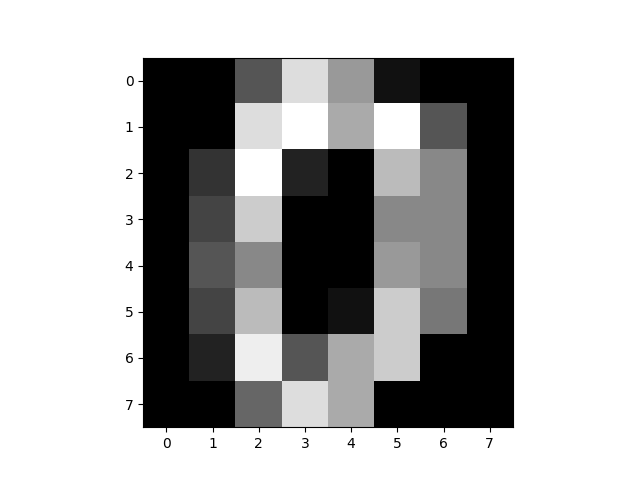

In [27]:
plt.imshow(dataset.images[0], cmap="gray")


In [32]:
dataset.data.min(), dataset.data.max()

(0.0, 16.0)

In [33]:
dataset.data.mean()


4.884164579855314

In [34]:
#dataset.target_names

In [7]:
# Creating a dataset with imbalanced binary classes:  
# Negative class (0) is 'not digit 1' 
# Positive class (1) is 'digit 1'
y_binary_imbalanced = y.copy() #copied the target values
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('Original labels:\t', y[1:30])
print('New binary labels:\t', y_binary_imbalanced[1:30])

Original labels:	 [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary labels:	 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [16]:
y_binary_imbalanced = y.copy()

display(y_binary_imbalanced)
#y_binary_imbalanced!=1
y_binary_imbalanced[y_binary_imbalanced != 1] = 0
y_binary_imbalanced 

array([0, 1, 2, ..., 8, 9, 8])

array([0, 1, 0, ..., 0, 0, 0])

In [37]:
np.bincount(y_binary_imbalanced)    # Negative class (0) is the most frequent class -- COUNT OF 0 AND 1

array([1615,  182])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

# Accuracy of Support Vector Machine classifier
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9955555555555555

### Dummy Classifiers

DummyClassifier is a classifier that makes predictions using simple rules, which can be useful as a baseline for comparison against actual classifiers, especially with imbalanced classes.

In [5]:
?DummyClassifier

Object `DummyClassifier` not found.


In [9]:
from sklearn.dummy import DummyClassifier

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
# Therefore the dummy 'most_frequent' classifier always predicts class 0
y_dummy_predictions = dummy_majority.predict(X_test)

y_dummy_predictions # only zeroes as it blindly predicts negative class.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [41]:
dummy_majority.score(X_test, y_test)

0.9044444444444445

 #### Dummy classifiers completely ignore the input data!
* #### Dummy classifiers serve as a sanity check on your classifier's performance.
* #### They provide a null metric(e.g. null accuracy) baseline.
* #### Dummy classifiers should not be used for real problems.
* #### Some commonly-used settings for the strategy parameter for DummyClassifier in  scikit-learn:
#####        – most_frequent: predicts the most frequent label in the training set.
#####        – stratified: random predictions based on training set class distribution.
#####        – uniform: generates predictions uniformly at random.
#####        – constant: always predicts a constant label provided by the user. 
######                     -> A major motivation of this method is F1-scoring, when the positive class is in the minority.

### What if my classifier accuracy is close to the null accuracy baseline?
* #### This could be a sign of:
#####    •  Ineffective, erroneous or missing features
#####    •  Poor choice of kernel or hyperparameter
#####    •  Large class imbalance

In [13]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9777777777777777

### Dummy regressors
##### strategy parameter options:
        •mean: predicts the mean of the training targets.
        •median: predicts the median of the training targets.
        •quantile: predicts a user-provided quantile of the training targets.
        •constant: predicts a constant user-provided value

### Confusion matrices

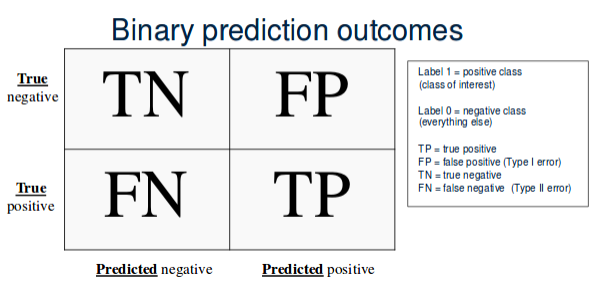

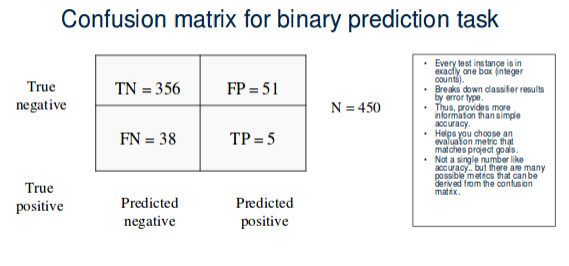

#### Binary (two-class) confusion matrix

In [21]:
from sklearn.metrics import confusion_matrix

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)

print('Most frequent class (dummy classifier)\n', confusion)

Most frequent class (dummy classifier)
 [[407   0]
 [ 43   0]]


In [11]:
# produces random predictions w/ same class proportion as training set
dummy_classprop = DummyClassifier(strategy='stratified').fit(X_train, y_train)
y_classprop_predicted = dummy_classprop.predict(X_test)
confusion = confusion_matrix(y_test, y_classprop_predicted)

print('Random class-proportional prediction (dummy classifier)\n', confusion)

Random class-proportional prediction (dummy classifier)
 [[371  36]
 [ 39   4]]


In [45]:
dummy_classprop.predict(X_test)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,

In [20]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)

print('Support vector machine classifier (linear kernel, C=1)\n', confusion)

Support vector machine classifier (linear kernel, C=1)
 [[402   5]
 [  5  38]]


In [47]:
#svm.score(X_test, y_test)

In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver="liblinear").fit(X_train, y_train)
#lr = LogisticRegression(max_iter=1000).fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)

print('Logistic regression classifier (default settings)\n', confusion)

Logistic regression classifier (default settings)
 [[401   6]
 [  6  37]]


In [49]:
import sklearn 
sklearn.__version__

'0.22.2'

In [28]:
?LogisticRegression

Object `LogisticRegression` not found.


In [14]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
tree_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)

print('Decision tree classifier (max_depth = 2)\n', confusion)

Decision tree classifier (max_depth = 2)
 [[400   7]
 [ 17  26]]


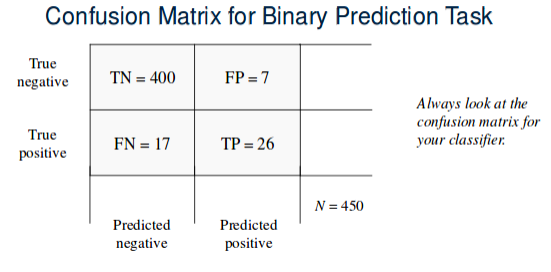

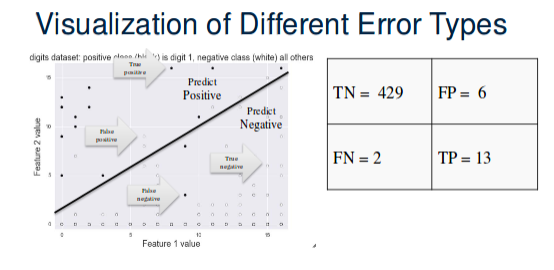

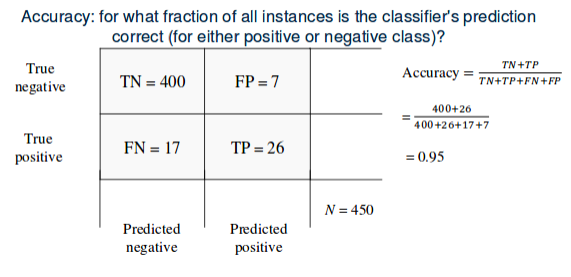

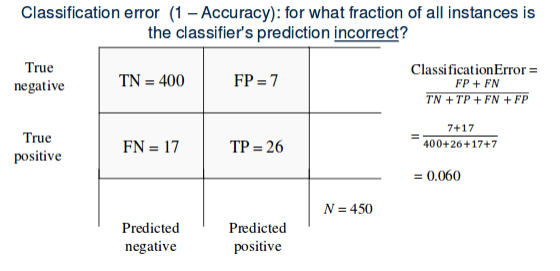

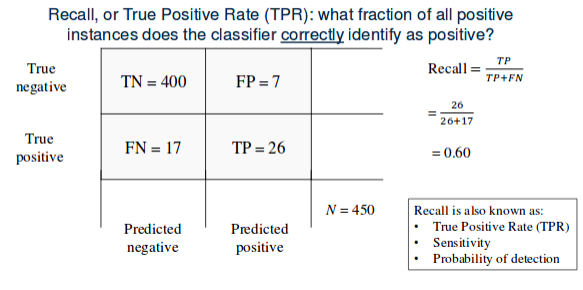

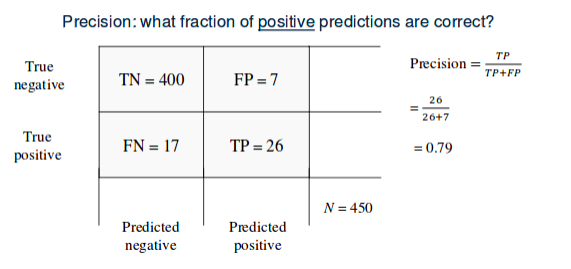

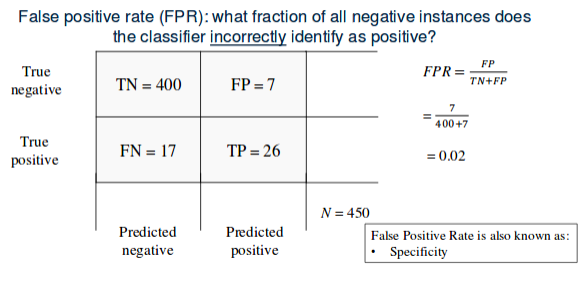

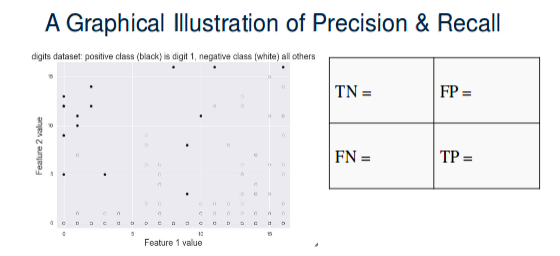

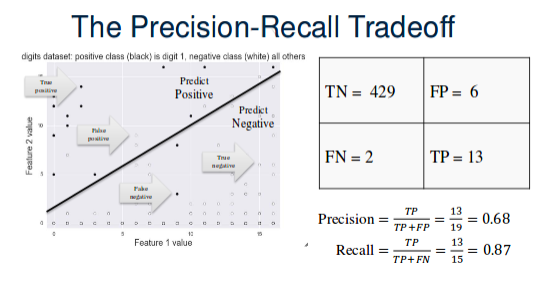

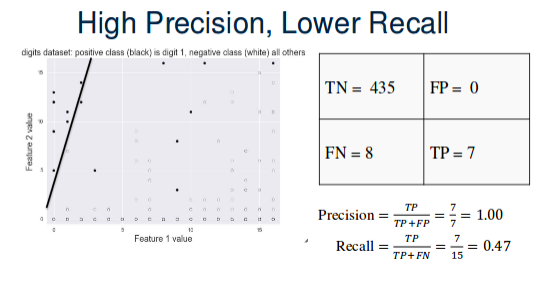

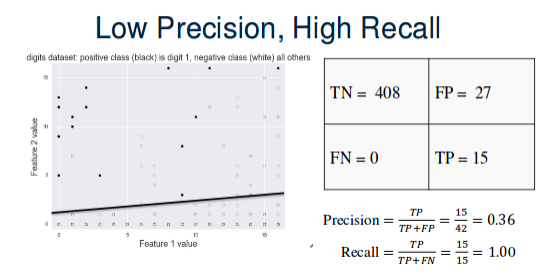

### There is often a tradeoff between precision and recall
* #### Recall-oriented machine learning tasks:
        – Search and information extraction in legal discovery
        – Tumor detection
        – Often paired with a human expert to filter out false positives
* #### Precision-oriented machine learning tasks:
        – Search engine ranking, query suggestion
        – Document classification
        – Many customer-facing tasks (users remember failures!)

### F1-score: combining precision & recall into a single number

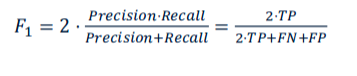

### F-score: generalizes F1-score for combining precision & recall into a single number

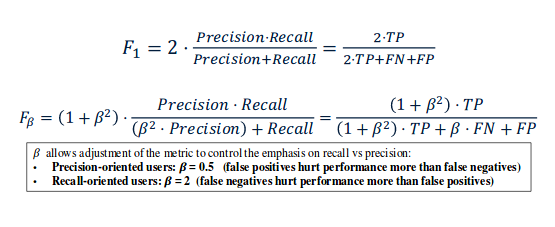

### Evaluation metrics for binary classification

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_predicted))) #pass --> (truth,prediction)
print('Precision: {:.2f}'.format(precision_score(y_test, tree_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, tree_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, tree_predicted)))

Accuracy: 0.95
Precision: 0.79
Recall: 0.60
F1: 0.68


In [25]:
# Combined report with all above metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, tree_predicted, target_names=['not 1', '1']))

              precision    recall  f1-score   support

       not 1       0.96      0.98      0.97       407
           1       0.79      0.60      0.68        43

    accuracy                           0.95       450
   macro avg       0.87      0.79      0.83       450
weighted avg       0.94      0.95      0.94       450



In [33]:
print('Random class-proportional (dummy)\n', 
      classification_report(y_test, y_classprop_predicted, target_names=['not 1', '1']))
print('SVM\n', 
      classification_report(y_test, svm_predicted, target_names = ['not 1', '1']))
print('Logistic regression\n', 
      classification_report(y_test, lr_predicted, target_names = ['not 1', '1']))
print('Decision tree\n', 
      classification_report(y_test, tree_predicted, target_names = ['not 1', '1']))

Random class-proportional (dummy)
               precision    recall  f1-score   support

       not 1       0.91      0.89      0.90       407
           1       0.16      0.19      0.17        43

    accuracy                           0.83       450
   macro avg       0.53      0.54      0.54       450
weighted avg       0.84      0.83      0.83       450

SVM
               precision    recall  f1-score   support

       not 1       0.99      0.99      0.99       407
           1       0.88      0.88      0.88        43

    accuracy                           0.98       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.98      0.98      0.98       450

Logistic regression
               precision    recall  f1-score   support

       not 1       0.99      0.99      0.99       407
           1       0.86      0.86      0.86        43

    accuracy                           0.97       450
   macro avg       0.92      0.92      0.92       450
weighted avg 

### Decision functions (decision_function)

* #### Each classifier score value per test point indicates how confidently the classifier predicts the positive class (large-magnitude positive values) or the negative class (large-magnitude negative values).
* #### Choosing a fixed decision threshold gives a classification rule.
* #### By sweeping the decision threshold through the entire range of possible score values, we get a series of classification outcomes that form a curve.

In [55]:
#pd.DataFrame({"y": y_test, "y_pred":lr_predicted , "decision_score":y_scores_lr})

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)


y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))

# show the decision_function scores for first 20 instances
y_score_list

[(0, -23.172085481526782),
 (0, -13.542339812271333),
 (0, -21.717596621869525),
 (0, -18.903401290751667),
 (0, -19.73348162853553),
 (0, -9.746123826634356),
 (1, 5.232571146886569),
 (0, -19.307699488399386),
 (0, -25.099317431015827),
 (0, -21.824240917355066),
 (0, -24.14391490349749),
 (0, -19.57863654291196),
 (0, -22.56880923943757),
 (0, -10.823019071634173),
 (0, -11.908471434266657),
 (0, -10.977496419867888),
 (1, 11.206736462182002),
 (0, -27.64403643672642),
 (0, -12.857751402383737),
 (0, -25.848034318474784)]

In [57]:
#pd.DataFrame(np.sort(lr.fit(X_train, y_train).decision_function(X_test)))

### Predicted Probability of Class Membership (predict_proba)
* #### Typical rule: choose most likely class
        – e.g class 1 if threshold > 0.50.
* #### Adjusting threshold affects predictions of classifier.
* #### Higher threshold results in a more conservative classifier
        – e.g. only predict Class 1 if estimated probability of class 1 is above 70%  
        – This increases precision. Doesn't predict class 1 as often, but when it does,it gets high proportion of    class 1 instances correct.
* #### Not all models provide realistic probability estimates

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20], y_proba_lr[0:20,1]))

# show the probability of positive class for first 20 instances
y_proba_list

[(0, 8.639550373186043e-11),
 (0, 1.314122879865159e-06),
 (0, 3.6997095171912286e-10),
 (0, 6.171022466706748e-09),
 (0, 2.6906537820016864e-09),
 (0, 5.851763793631655e-05),
 (1, 0.9946885835033391),
 (0, 4.118818475445005e-09),
 (0, 1.25749115844087e-11),
 (0, 3.3254666570763413e-10),
 (0, 3.269120927980541e-11),
 (0, 3.141276641109229e-09),
 (0, 1.5793947283879333e-10),
 (0, 1.9934891761343818e-05),
 (0, 6.733077975552299e-06),
 (0, 1.708151793411904e-05),
 (1, 0.9999864177945462),
 (0, 9.87069012218645e-13),
 (0, 2.6058438297855025e-06),
 (0, 5.947594174964362e-12)]

In [59]:
pd.DataFrame(y_score_list)

,0,1
0,0,-23.176990
1,0,-13.541450
2,0,-21.722627
3,0,-18.907088
4,0,-19.735543
5,0,-9.749765
6,1,5.235016
7,0,-19.307665
8,0,-25.100995
9,0,-21.827195


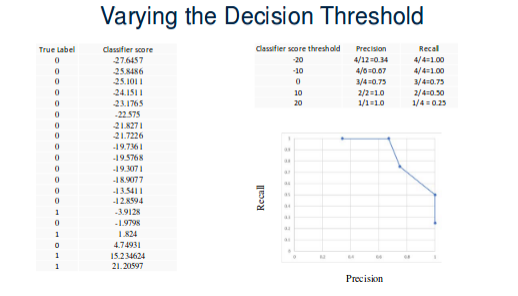

### Precision-recall curves

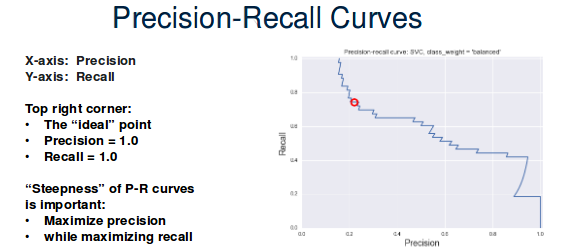

In [18]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
#plt.plot(1.0, 0.209302, 'o', markersize = 12, fillstyle = 'none', c='b', mew=3)

plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
#plt.axes().set_aspect('equal')
plt.show()

NameError: name 'y_scores_lr' is not defined

In [62]:
thresholds

array([-4.04786238, -3.93677525, -3.48699528, -3.44796834, -3.34278934,
       -2.57456047, -2.3765806 , -2.3481093 , -2.30147509, -2.15818274,
       -2.0375392 , -1.87217459, -1.753053  , -1.72738102, -1.68498786,
       -1.48111012, -1.34042244, -1.3034868 , -1.08186052, -0.56687046,
        0.13137466,  0.17418038,  0.47505394,  0.63947254,  1.00504506,
        1.33615531,  1.68336839,  1.69831908,  1.88023333,  2.19062709,
        2.43539699,  2.55302334,  3.72022504,  3.80726877,  4.21186787,
        4.25154271,  4.30629002,  4.31535306,  4.55492216,  4.57009949,
        4.93257711,  5.23501572,  5.73352008,  6.12971908,  6.55494069,
        6.87010776,  6.92988842,  7.21942281,  7.37435585,  7.81056418,
        8.26291683,  8.39746453,  8.45765774,  9.84767691,  9.87267901,
       10.20064954, 11.20589349, 11.48238912, 11.54997716, 11.68165205,
       13.25892141, 14.73763366, 16.0282684 ])

In [63]:
lr.fit(X_train, y_train).score(X_test,y_test)

0.9733333333333334

Receiver Operating Characteristics

### ROC curves, Area-Under-Curve (AUC)

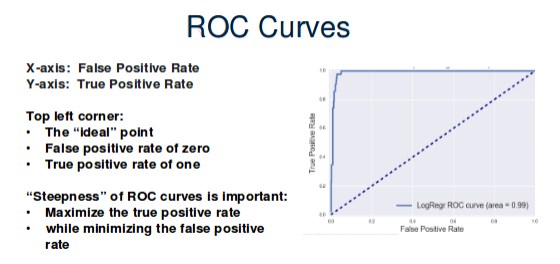

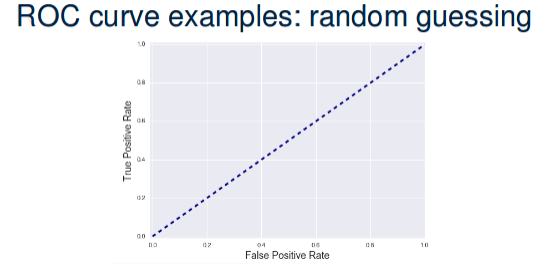

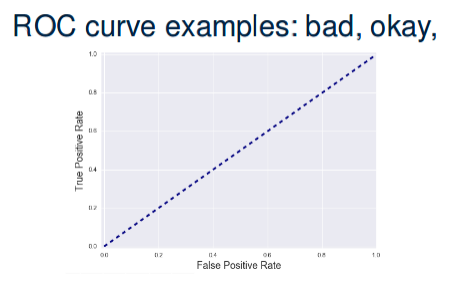

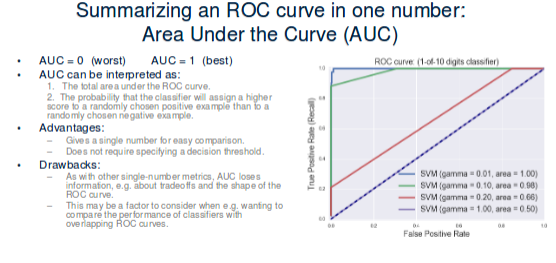

In [3]:
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
#plt.axes().set_aspect('equal')
plt.show()

NameError: name 'y_binary_imbalanced' is not defined

<IPython.core.display.Javascript object>


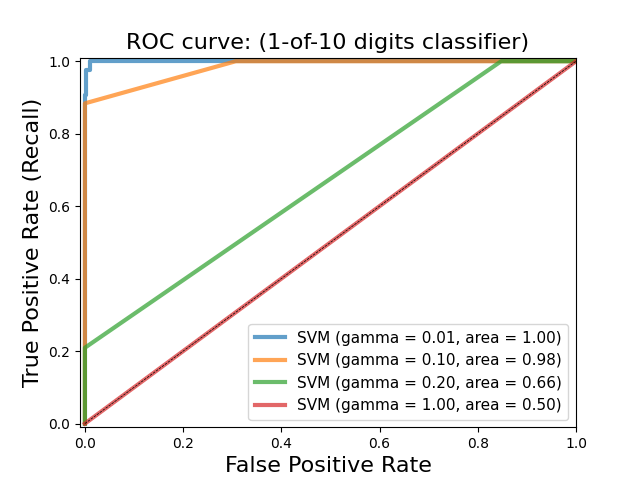

gamma = 0.01  accuracy = 0.91   AUC = 1.00
gamma = 0.10  accuracy = 0.90   AUC = 0.98
gamma = 0.20  accuracy = 0.90   AUC = 0.66
gamma = 1.00  accuracy = 0.90   AUC = 0.50


In [41]:
from matplotlib import cm

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 1]:
    svm = SVC(gamma=g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)
    print("gamma = {:.2f}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy_svm, 
                                                                    roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, 
             label='SVM (gamma = {:0.2f}, area = {:0.2f})'.format(g, roc_auc_svm))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
#plt.axes().set_aspect('equal')

plt.show()

### Evaluation measures for multi-class classification

### Multi-Class Evaluation
* #### Multi-class evaluation is an extension of  the binary case.
        – A collection of true vs predicted binary outcomes, one per class
        – Confusion matrices are especially useful
        – Classification report
* #### Overall evaluation metrics are averages across classes
        – But there are different ways to average multi-class results: we will cover these shortly.
        – The support (number of instances) for each class is important to consider, e.g. in case of imbalanced             classes
* #### Multi-label classification: each instance can have multiple labels (not covered here)

#### Multi-class confusion matrix

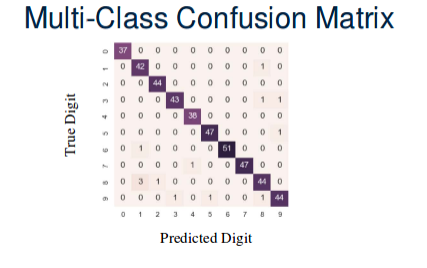

<IPython.core.display.Javascript object>


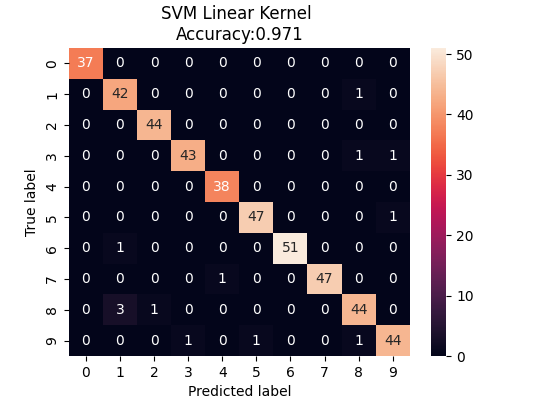

<IPython.core.display.Javascript object>


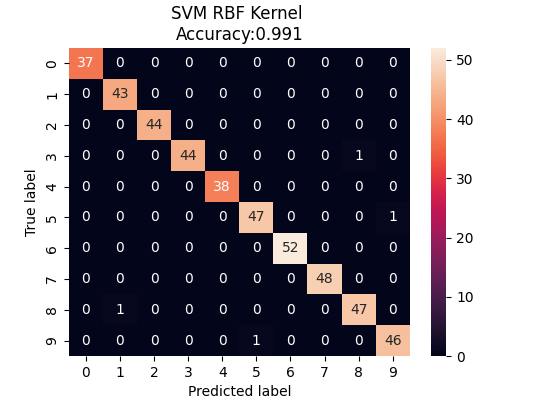

In [22]:
dataset = load_digits()
X, y = dataset.data, dataset.target
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, y, random_state=0)


svm = SVC(kernel = 'linear').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, 
                     index = [i for i in range(0,10)], columns = [i for i in range(0,10)])

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                       svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label')


svm = SVC(kernel = 'rbf').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, index = [i for i in range(0,10)],
                  columns = [i for i in range(0,10)])

plt.figure(figsize = (5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM RBF Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                    svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label');

#### Multi-class classification report

In [68]:
print(classification_report(y_test_mc, svm_predicted_mc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      1.00      0.99        43
           2       1.00      1.00      1.00        44
           3       1.00      0.98      0.99        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       0.98      0.98      0.98        48
           9       0.98      0.98      0.98        47

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



#### Micro- vs. macro-averaged metrics

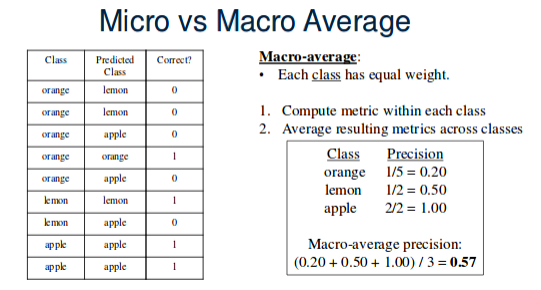

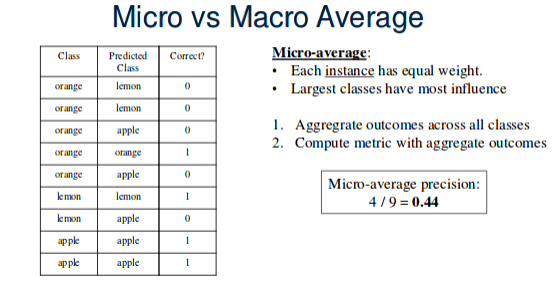

### Macro-Average vs Micro-Average
* #### If the classes have about the same number of instances, macro-and micro-average will be about the same.
* #### If some classes are much larger (more instances) than others, and you want to:
            – Weight your metric toward the largest ones, use micro-averaging.
            – Weight your metric toward the smallest ones, use macro-averaging.
* #### If the micro-average is much lower than the macro-average then examine the larger classes for poor metric performance.
* #### If the macro-average is much lower than the micro-averagethen examine the smaller classes for poor metric performance. 

### Multi-class Evaluation Metrics via the "Average" Parameter for a Scoring Function
* #### Micro:  Metric on aggregated instances
* #### Macro: Mean per-class metric, classes have equal weight
* #### Weighted:   Mean per-class metric, weighted by support
* #### Samples: for multi-label problems only 

In [69]:
print('Micro-averaged precision = {:.2f} (treat instances equally)'
      .format(precision_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-averaged precision = {:.2f} (treat classes equally)'
      .format(precision_score(y_test_mc, svm_predicted_mc, average = 'macro')))

Micro-averaged precision = 0.99 (treat instances equally)
Macro-averaged precision = 0.99 (treat classes equally)


In [70]:
?precision_score

In [71]:
print('Micro-averaged f1 = {:.2f} (treat instances equally)'
      .format(f1_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-averaged f1 = {:.2f} (treat classes equally)'
      .format(f1_score(y_test_mc, svm_predicted_mc, average = 'macro')))

Micro-averaged f1 = 0.99 (treat instances equally)
Macro-averaged f1 = 0.99 (treat classes equally)


### Regression evaluation metrics

### Regression metrics
* #### Typically r2_score is enough
        – Reminder: computes how well future instances will be predicted
        – Best possible score is 1.0
        – Constant prediction score is 0.0
* #### Alternative metrics include:
        – mean_absolute_error(absolute difference of target & predicted values)
        – mean_squared_error(squared difference of target & predicted values)
        – median_absolute_error(robust to outliers)

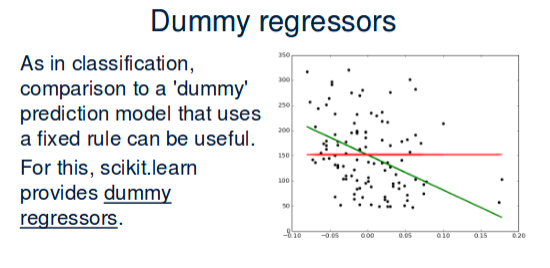

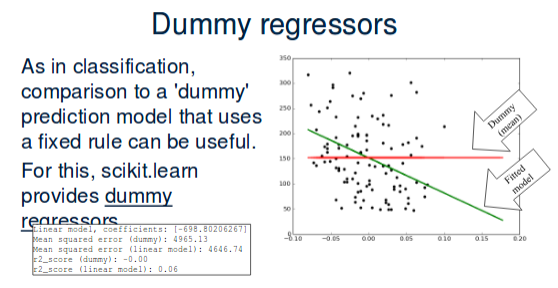

Linear model, coefficients:  [-698.80206267]
Mean squared error (dummy): 4965.13
Mean squared error (linear model): 4646.74
r2_score (dummy): -0.00
r2_score (linear model): 0.06


<IPython.core.display.Javascript object>


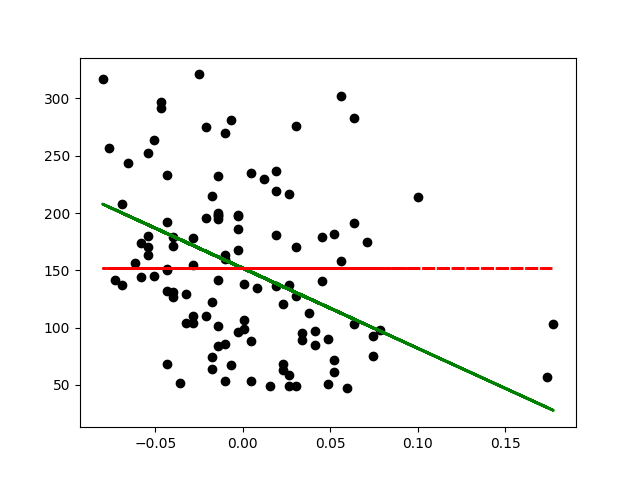

In [23]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

diabetes = datasets.load_diabetes()

X = diabetes.data[:, None, 6]
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lm = LinearRegression().fit(X_train, y_train)
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)

y_predict = lm.predict(X_test)
y_predict_dummy_mean = lm_dummy_mean.predict(X_test)

print('Linear model, coefficients: ', lm.coef_)
print("Mean squared error (dummy): {:.2f}".format(mean_squared_error(y_test, 
                                                                     y_predict_dummy_mean)))
print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(y_test, y_predict)))
print("r2_score (dummy): {:.2f}".format(r2_score(y_test, y_predict_dummy_mean)))
print("r2_score (linear model): {:.2f}".format(r2_score(y_test, y_predict)))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_predict, color='green', linewidth=2)
plt.plot(X_test, y_predict_dummy_mean, color='red', linestyle = 'dashed', 
         linewidth=2, label = 'dummy')

plt.show()

In [73]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [74]:
#print(diabetes.DESCR)

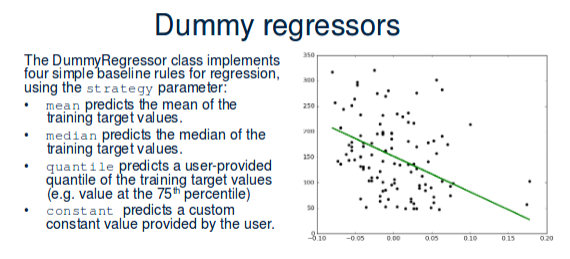

In [75]:
r2_score(y_test, y_predict_dummy_mean)

-0.00014359578276068596

### Model selection using evaluation metrics

### Model Selection Using Evaluation Metrics
* #### Train/test on same data
        – Single metric.
        – Typically overfits and likely won't generalize well to new data.
        – But can serve as a sanity check: low accuracy on the training set may indicate an implementation problem.
* #### Single train/test split
        – Single metric.
        – Speed and simplicity.
        – Lack of variance information
* #### K-fold cross-validation
        – K train-test splits.
        – Average metric over all splits.
        – Can be combined with parameter grid search: GridSearchCV(def. cv = 3)

#### Cross-validation example

In [76]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

dataset = load_digits()
# again, making this a binary problem with 'digit 1' as positive class 
# and 'not 1' as negative class
X, y = dataset.data, dataset.target == 1
clf = SVC(kernel='linear', C=1)

# accuracy is the default scoring metric
print('Cross-validation (accuracy)', cross_val_score(clf, X, y))
# use AUC as scoring metric
print('Cross-validation (AUC)', cross_val_score(clf, X, y, cv=5, scoring = 'roc_auc'))
# use recall as scoring metric
print('Cross-validation (recall)', cross_val_score(clf, X, y, cv=5, scoring = 'recall'))

Cross-validation (accuracy) [0.91944444 0.98611111 0.97214485 0.97493036 0.96935933]
Cross-validation (AUC) [0.9641871  0.9976571  0.99372205 0.99699002 0.98675611]
Cross-validation (recall) [0.81081081 0.89189189 0.83333333 0.83333333 0.83333333]


#### Grid search example

In [77]:
#np.set_printoptions(threshold=np.inf)
#dataset.target == 1

In [78]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = SVC(kernel='rbf')
grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100],}

# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test) 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

# alternative metric to optimize over grid parameters: AUC
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc')
grid_clf_auc.fit(X_train, y_train)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test) 

print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)


Grid best parameter (max. accuracy):  {'gamma': 0.001}
Grid best score (accuracy):  0.9985157648354676
Test set AUC:  0.99982858122393
Grid best parameter (max. AUC):  {'gamma': 0.001}
Grid best score (AUC):  1.0


#### Evaluation metrics supported for model selection

In [28]:
from sklearn.metrics import SCORERS

print(sorted(list(SCORERS.keys())))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'top_k_accuracy', 'v_measure_score']


### Two-feature classification example using the digits dataset

#### Optimizing a classifier using different evaluation metrics

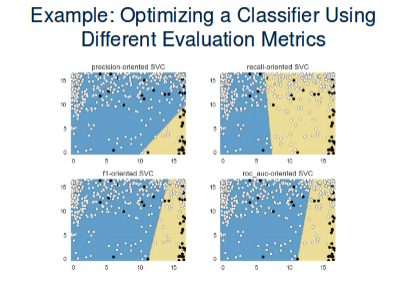

In [80]:
pd.DataFrame(np.random.rand(X_train.shape[0], 2))

,0,1
0,0.801657,0.917844
1,0.026935,0.804244
2,0.815905,0.626932
3,0.907834,0.674433
4,0.775877,0.862565
...,...,...
1342,0.252460,0.531302
1343,0.365370,0.930502
1344,0.948346,0.139471
1345,0.676689,0.725330


<IPython.core.display.Javascript object>


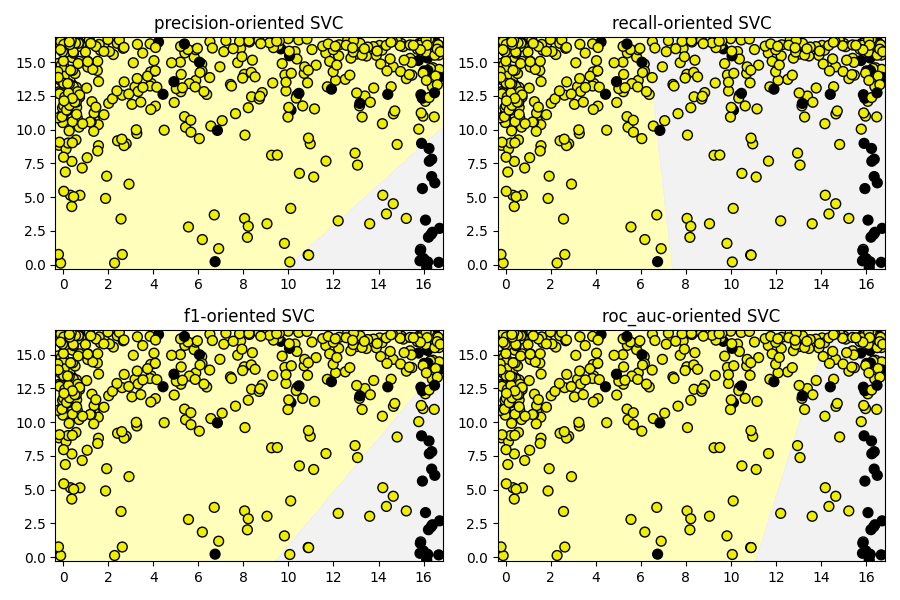

Grid best parameter (max. precision): {'class_weight': {1: 2}}
Grid best score (precision): 0.5424242832144299
Grid best parameter (max. recall): {'class_weight': {1: 50}}
Grid best score (recall): 0.9285714285714285
Grid best parameter (max. f1): {'class_weight': {1: 3}}
Grid best score (f1): 0.5375062031984277
Grid best parameter (max. roc_auc): {'class_weight': {1: 4}}
Grid best score (roc_auc): 0.894476414374566


In [24]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create a two-feature input vector matching the example plot above
# We jitter the points (add a small amount of random noise) in case there are areas
# in feature space where many instances have the same features.
jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]]+ np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test  = X_test[:,[20,59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

clf = SVC(kernel = 'linear').fit(X_twovar_train, y_train)
grid_values = {'class_weight':['balanced', {1:2},{1:3},{1:4},{1:5},{1:10},{1:20},{1:50}]}
plt.figure(figsize=(9,6))
for i, eval_metric in enumerate(('precision','recall', 'f1','roc_auc')):
    grid_clf_custom = GridSearchCV(clf, param_grid=grid_values, scoring=eval_metric)
    grid_clf_custom.fit(X_twovar_train, y_train)
    print('Grid best parameter (max. {0}): {1}'
          .format(eval_metric, grid_clf_custom.best_params_))
    print('Grid best score ({0}): {1}'
          .format(eval_metric, grid_clf_custom.best_score_))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plot_class_regions_for_classifier_subplot(grid_clf_custom, X_twovar_test, y_test, None,
                                             None, None,  plt.subplot(2, 2, i+1))
    
    plt.title(eval_metric+'-oriented SVC')
plt.tight_layout()
plt.show()

In [88]:
?SVC

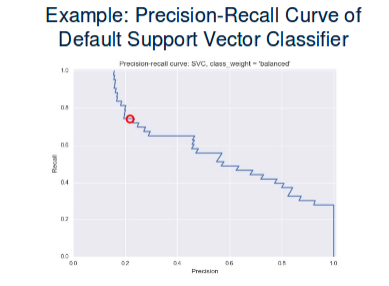

#### Precision-recall curve for the default SVC classifier (with balanced class weights)

<IPython.core.display.Javascript object>


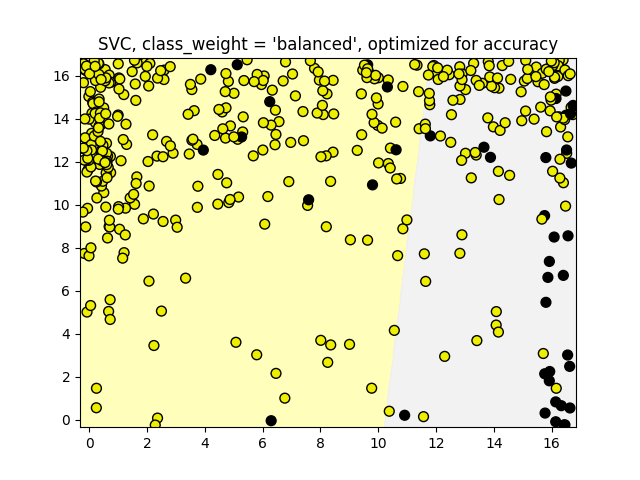

<IPython.core.display.Javascript object>


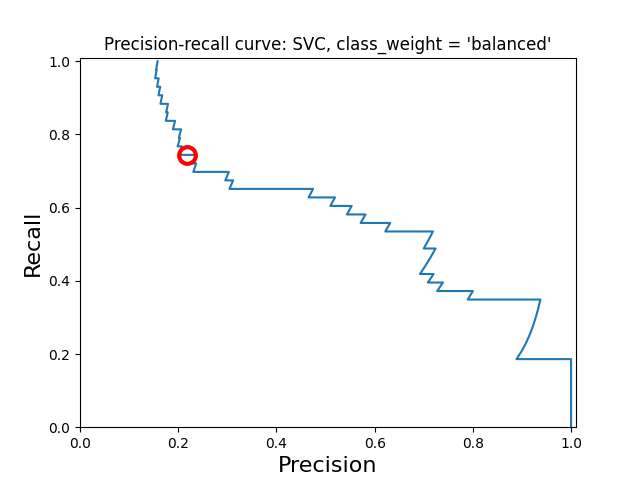

At zero threshold, precision: 0.22, recall: 0.74


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from adspy_shared_utilities import plot_class_regions_for_classifier
from sklearn.svm import SVC

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# create a two-feature input vector matching the example plot above
jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]]+ np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test  = X_test[:,[20,59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

clf = SVC(kernel='linear', class_weight='balanced').fit(X_twovar_train, y_train)

y_scores = clf.decision_function(X_twovar_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plot_class_regions_for_classifier(clf, X_twovar_test, y_test)
plt.title("SVC, class_weight = 'balanced', optimized for accuracy")
plt.show()

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.title ("Precision-recall curve: SVC, class_weight = 'balanced'")
plt.plot(precision, recall, label = 'Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize=12, fillstyle='none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
#plt.axes().set_aspect('equal')
plt.show()
print('At zero threshold, precision: {:.2f}, recall: {:.2f}'
      .format(closest_zero_p, closest_zero_r))

### Training, Validation, and Test Framework for Model Selection and Evaluation
* #### Using only cross-validation or a test set to do model selection may lead to more subtle overfitting / optimistic generalization estimates
* ####  Instead, use three data splits:
            1. Training set (model building)
            2. Validation set (model selection)
            3. Test set (final evaluation)
* #### In practice:
            – Create an initial training/test split
            – Do cross-validation on the training data for model/parameter selection
            – Save the held-out test set for final model evaluation

### Concluding Notes
* #### Accuracy is often not the right evaluation metric for many real-world machine learning tasks
            – False positives and false negatives may need to be treated very differently
            – Make sure you understand the needs of your application and choose an evaluation metric that matches your application, user, or business goals.
* #### Examples of additional evaluation methods include:
            – Learning curve: How much does accuracy (or other metric) change as a function of the amount of training data?
            –Sensitivity analysis:  How much does accuracy (or other metric) change as a function of key learning          parameter values?